In [12]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [13]:
!pip install tensorflow opencv-python matplotlib

In [2]:
# Import standard dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [15]:
# Import tensorflow dependencies
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [16]:
# GPU Restriction Code, would need it if working on a GPU based device

# Avoid OOM errors by setting GPU Memory Consumption Growth

gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

    for gpu in gpus:
        print(gpu)
else:
    print("No GPUs available.")


No GPUs available.


In [26]:
# Setup paths
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')


In [18]:
# Make the Directories
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

FileExistsError: [Errno 17] File exists: 'data/positive'

In [27]:
# Move LFW Images to the following repository data/negative
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

FileNotFoundError: [Errno 2] No such file or directory: 'lfw'

In [24]:
# Import uuid library to generate unique image names
import uuid

In [30]:
 # Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # Cut down frame to 250*250px
    frame = frame[100:100+250,580:580+250,:]

    # Collect anchors
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # Create unique file path
        imgName = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgName, frame)

    
    # Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create unique file path
        imgName = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image
        cv2.imwrite(imgName, frame) 
        
    # Show image back to screen
    cv2.imshow('Image Collection', frame)

    # Breaking
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

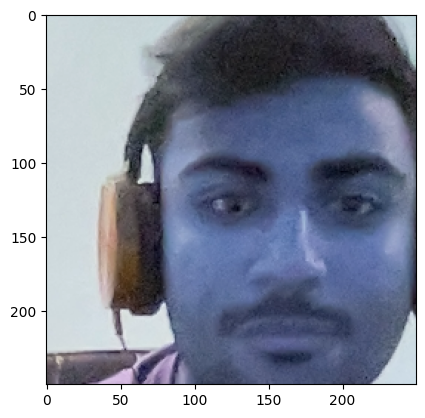

In [31]:
plt.imshow(frame)